<a href="https://colab.research.google.com/github/sharvari-gote/Data_Analytics_Projects/blob/main/Youtube_Text_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Youtube Text Data Analysis
The dataset used is the *UScomments.csv* (691375 entries) columns consisting of
- video_id
- comment_text
- likes
- replies



**Link for the dataset and additional files used:**
(https://drive.google.com/drive/folders/1UGT4XOSTZCOu1lTDQAf5Nm5JZVkZj1T8?usp=sharing)

##The libraries used for the Text Analysis are:
- Pandas - Data manipulation and analysis.
- NumPy - High-level mathemaitical operations.
- Matplotlib - Plotting.
- Seaborn - Data visualization.
- TextBlob - Processing textual data.
- WordCloud - Word Cloud generator.

In [ ]:
# Plotting a Bar graph of first 15 emojis with highest frequency count using plotply.
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import emoji 

In [ ]:
import plotly.graph_objs as go

##Uploading the dataset from Google Drive.

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:

downloaded = drive.CreateFile({'id' : "1qKk5_UtDwn76tWC-LXVtyV3fa1f7qjuw"})
downloaded.GetContentFile("UScomments.csv")

In [ ]:
# Converting the csv file to dataframe.
data = pd.read_csv("UScomments.csv", on_bad_lines  = 'skip')
data.head(10)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0


In [ ]:
# Checking null values and if any, dropping them.
data.isnull().sum()
data.dropna(inplace = True)
data.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691375 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691375 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691375 non-null  object
 3   replies       691375 non-null  object
dtypes: object(4)
memory usage: 26.4+ MB


#**Performing Sentiment Analysis.**


## TextBlob library used for Sentiment Analysis.
###The library is used for processing textual data. Often used in the domain of NLP(Natural Lamnguage Processing) for sentiment analysis, translation and much more.
#### For sentiment analysis we have two parameters polarity and subjectivity of the given sentence. 
1. **Polarity** : It lies between [-1,1] where -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity.

2. **Subjectivity** : It quantifies the amount of personal opinion and factual information contained in the text. The range of subjectivity is [0,1]. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [ ]:
# Installing Textblob library.
! pip install -U textblob


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 KB 30.8 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


In [ ]:
# The TextBlob we get polarity and subjectivity for each sentence.
from textblob import TextBlob

In [ ]:
def polarity_senti(text):
    return TextBlob(text).sentiment.polarity
data["polarity"] = data["comment_text"].apply(polarity_senti)
data.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [ ]:
def subjectivity_senti(text):
    return TextBlob(text).sentiment.subjectivity
data["subjectivity"] = data["comment_text"].apply(subjectivity_senti)
data.head(10)

,video_id,comment_text,likes,replies,polarity,subjectivity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000,0.100000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000,0.100000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000,1.000000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714,0.507143


In [ ]:
pos_comments = data.polarity.value_counts()[1.0]
neg_comments = data.polarity.value_counts()[-1.0]
low_sub = data.subjectivity.value_counts()[0.0]
high_sub = data.subjectivity.value_counts()[1.0]
print("The number of postive comments are {}.".format(pos_comments))
print("The number of negative comments are {}.".format(neg_comments))
print("The number of comments with least subjectivity are {}.".format(low_sub))
print("The number of comments with highest subjectivity are {}.".format(high_sub))

The number of postive comments are 19390.
The number of negative comments are 3508.
The number of comments with least subjectivity are 262300.
The number of comments with highest subjectivity are 57170.


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

# Create subplots
fig = make_subplots(
   rows=1, cols=2,
   specs=[[{"type": "domain"}, {"type": "domain"}]],
   subplot_titles=['Polarity Distribution', 'Subjectivity Distribution'],
)
# Set traces for the pie chart
fig.add_trace(go.Pie(
   values=[pos_comments, neg_comments],
   labels=["Positive Comments", "Negative Comments"],
   domain=dict(x=[0, 0.5]),
   name="colors1"),
   row=1, col=1
)
# Traces for the second pie chart
fig.add_trace(go.Pie(
   values = [low_sub, high_sub],
   labels = ["Least subjectivity", "Highest subjectivity"],
   domain = dict(x=[0,0], y = [1.0, 1.0]),
   name = "color3"),
   row = 1, col = 2

)
fig.update_layout(title = dict(text = "Pie Charts for Polarity and Subjectivity", x = .45),
                  title_font_size = 25)

## **Observations**
- Polarity : Postive comments are about 85%.
- Subjectivity : Least subjective comments are about 82%.

#**Representation of Sentiments(Using Word Cloud)**


### Word Clouds are visual representations of words that give greater prominence to words that appear more frequently.
####Word Clouds are created for:
- Positive Comments (polarity = -1)
- Negative Comments (polarity = 1)


In [ ]:
# We take data with polarity -1 and 1 for sentiment representation.
postive_comm = data[data["polarity"] == 1]
negative_comm = data[data["polarity"] == -1]

In [ ]:
# Installing the necessary package.
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing all necessary modules to generate Word Cloud.
from wordcloud import WordCloud, STOPWORDS

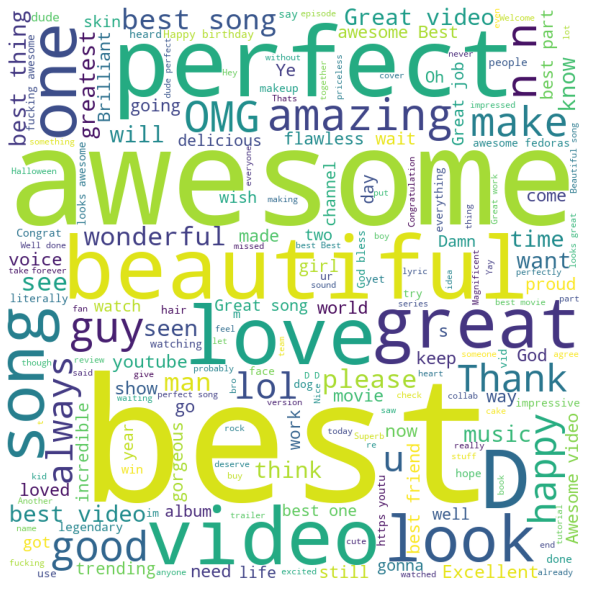

In [ ]:
# Generating Word Cloud for positive comments.
total_pos = ' '.join(postive_comm["comment_text"])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(total_pos)
# Plotting the WordCloud image                      
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

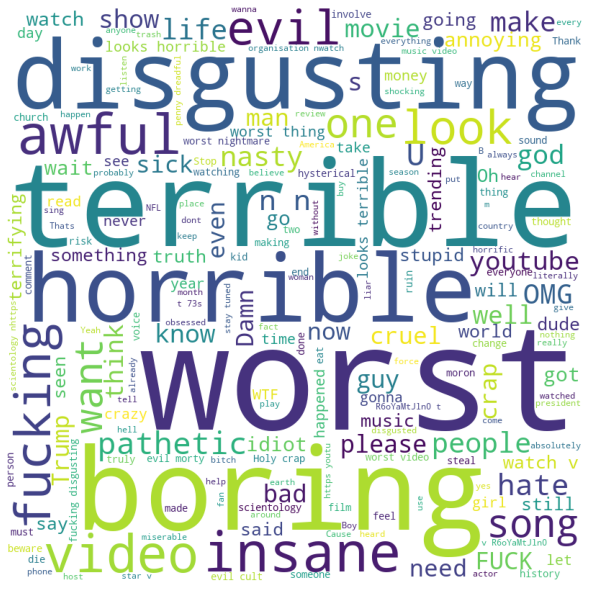

In [ ]:
# Generating Word Cloud for negative comments.
total_neg = ' '.join(negative_comm["comment_text"])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(total_neg)
# Plotting the WordCloud image                      
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## **Observations**:
The five most frequently occuring positive words are :
1.   best
2.   perfect
3.   awesome
4.   beautiful
5.   great

The five most frequently occuring negative words are :
1. worst
2. boring 
3. horrible
4. disgusting
5. terrible


## Performing Emoji Analysis 
We use the Emoji module of Python for the same.

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=2920c241e2070847700d23582f693a5ccf904ea5fe517469a50a9ad4869cd5cc
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
# Extracting all the emojis from the comments of the dataset and creating a list.
emoji_lst = []
for comment in data['comment_text']:
  for char in comment:
    if char in emoji.EMOJI_DATA:
      emoji_lst.append(char)


In [ ]:
len(emoji_lst)

294549

In [ ]:
# Creating dictionary of count of emojis.
freq = {}
for emo in emoji_lst:
  if emo in freq:
    freq[emo] += 1
  else:
    freq[emo] = 1
for key, value in freq.items():
  print (key, value)


⏪ 4
❓ 24
♏ 13
♈ 8
♉ 6
♌ 7
♎ 18
♐ 8
♑ 9
♒ 6
🤜 29
🚓 7
🧀 28
🍥 22
⏰ 12
⛏ 4
🗡 19
⛱ 5
✝ 146
🕯 8
🕶 18
🚇 7
🔇 6
🎛 4
🎚 4
🗯 9
🏁 18
💠 8
🎙 12
⏮ 3
🕴 37
▪ 8
🥓 12
🔼 11
✍ 9
🤰 14
🚋 10
⛽ 7
♻ 8
🔱 16
🍵 23
🍮 15
⬛ 141
⬜ 142
🔷 103
🔶 103
⚱ 7
🔍 9
🎣 15
🏄 25
🦃 13
🍌 35
🏐 33
▫ 6
🚶 14
🥐 10
❕ 26
📵 7
🍠 13
🍞 18
🍢 16
🍡 43
⚾ 22
🏉 41
🏌 7
🏒 7
⛷ 5
🏂 9
🏏 5
🏸 9
🎱 57
🏓 22
🤳 8
🔻 19
🔀 7
⏩ 8
↘ 8
⏬ 4
🔺 13
☁ 87
🏜 6
🌅 13
🌿 27
⚪ 8
🌧 11
🏞 6
🏊 16
🛐 13
🥝 10
🗨 6
⚖ 12
🤶 6
🌰 49
🍲 12
🍛 21
🏹 7
🛌 14
🛏 7
🛋 6
🚿 7
🛀 11
🕐 6
🚴 9
🌩 61
🌥 4
🌫 4
🥃 13
🤬 1
🚎 4
🏫 17
🚈 5
🚍 5
🥘 14
🥄 6
🥕 9
⛄ 8
🌡 7
🏺 5
🛎 12
🚰 11
⛓ 4
🚗 13
♿ 6
🅰 28
🛰 6
🔯 49
⛎ 6
⚜ 18
⚕ 8
✳ 14
❔ 4
❇ 18
🚯 7
🚼 16
🚺 10
🚻 12
❎ 5
🈁 7
📶 5
↪ 10
↔ 5
🔛 17
✖ 17
➰ 14
◾ 4
🔘 6
🔲 4
🕖 5
🕕 6
🕓 7
🕛 7
🕤 7
🕞 5
🏴 15
🎌 5
🖋 7
🖇 3
🖌 3
🔎 6
🔏 4
🖍 7
☪ 4
🎳 21
🚌 5
🚠 7
🛴 12
🚜 4
🍽 8
🌨 16
🏠 28
🚐 4
🕢 5
🕥 5
☂ 3
🥖 10
🥞 9
🍘 7
🌂 5
🦐 7
🦈 10
🦂 6
🦏 4
🦍 4
🤺 3
⛹ 10
🤽 8
🤼 8
🤾 6
🚵 11
🏇 5
🎽 4
🎟 38
🛵 4
🚘 12
🚃 4
🚅 5
🚊 5
🛫 4
🛬 4
🚉 4
🚖 4
🚞 8
🚁 6
🛩 3
🚆 6
🚟 4
🚄 4
🛳 4
🛥 5
🛶 3
⛴ 5
🕳 3
🥚 5
🍙 10
🥅 4
🏑 3
🛍 9
🎑 5
🌉 10
🗾 6
🛁 6
🛠 7
🔩 15
♾ 1
🉐 7
🈵 6
🔈 

In [ ]:
# Extracting first 15 emojis with highest frequency count.
top_15_emojis = sorted(freq.items(), key=lambda x:x[1], reverse = True)[:15]
emo_lst = []
emo_freq = []
for index, item in enumerate(top_15_emojis):
  emo_lst.append(item[0])
  emo_freq.append(item[1])
top_15_emojis

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147),
 ('♥', 4909),
 ('😊', 3596),
 ('🏻', 3438),
 ('💜', 3429),
 ('😬', 3381)]

In [ ]:
from plotly.offline import iplot
layout = {'title': 'Frequency Count Of Emojis', "xaxis" : dict (title ="Emojis"),  "yaxis" :
          dict(title="Frequency Count")}
trace = go.Bar(x = emo_lst, y = emo_freq)
figure = {'data': [trace], 'layout': layout}
iplot(figure)


## **Observations**:
- There almost 2.9 million emjos present in the comments.

#**Collecting entire Youtube data for 10 the countries.**
### Creating a dataset of all the data about the Youtube videos for 10 following countries:

- CA - Canada
- DE – Germany
- FR - France
- GB - United Kingdom
- IN - India
- JP - Japan
- KR - Korea, Republic
- MX – Mexico
- RU - Russia
- US – United States

Data has these attributes:
- video_id 
- trending_date
- title
- channel_title
- category_id
- publish_time
- tags
- views
- likes
- dislikes
- comment_count
- ratings_disabled
- video_error_or_removed
- description
- Country  
- thumbnail_link


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def myfunction(data):
  print(data)
file_path = 'drive/MyDrive/Pandas_Project/Youtube_Analysis/Additional data'

In [ ]:
# Combining the data from all the countries into one list.
import os
files_csv = []
for file in os.listdir(file_path):
  if file.endswith(".csv"):
    myfunction(file)
    files_csv.append(file)

CAvideos.csv
DEvideos.csv
FRvideos.csv
GBvideos.csv
INvideos.csv
JPvideos.csv
KRvideos.csv
MXvideos.csv
RUvideos.csv
USvideos.csv


In [ ]:
for i in files_csv:
  print(i[0:2])

CA
DE
FR
GB
IN
JP
KR
MX
RU
US


In [ ]:
# Creating a dataset of all the data of all 10 countries and also adding the "Country" feature in the dataset which describes from which counry the video originated.

full_df = pd.DataFrame()
for i in files_csv:
  current_df = pd.read_csv(file_path+'/'+i, encoding = "iso-8859-1", on_bad_lines  = 'skip')
  current_df["Country"] = i[0:2]
  full_df = pd.concat([full_df, current_df])
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


In [ ]:
# Columns of the combined dataset.
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'Country'],
      dtype='object')

In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375942 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-nu

##**Distribution of each category of videos.**
- For this we use the category_id column of the dataset.
- We need the **category_file.txt** to cross-reference the category-name with category-id.
 

In [ ]:
# Describing the unique values contained in the category_id.
print("The number of unique catetgories in the dataset are: {}".format(full_df['category_id'].nunique()))
print("The unique categories are: {}".format(tuple(full_df['category_id'].unique())))

The number of unique catetgories in the dataset are: 18
The unique categories are: (10, 23, 24, 25, 22, 26, 1, 28, 20, 17, 29, 15, 19, 2, 27, 43, 30, 44)


In [ ]:
# Creating a dataframe of file category_file.txt.
file_path_cat = 'drive/MyDrive/Pandas_Project/Youtube_Analysis/category_file.txt'
category = pd.read_csv(file_path_cat, sep = ":")
category.reset_index(inplace = True)
category.columns = ["category_id", "category_name"]
category.set_index('category_id', inplace = True)
category

,category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [ ]:
# Creating a dictionary of category-id and category-name.
category_tab = category.to_dict()["category_name"]

In [ ]:
# Mapping the Category Name to Category_id.
full_df["Category Name"] = full_df["category_id"].map(category_tab)
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,Category Name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music


In [ ]:
# Catergory Distribution.
category_distribution = full_df["Category Name"].value_counts()
category_distribution.sort_values(inplace = True)
category_distribution = category_distribution[2:]
category_distribution

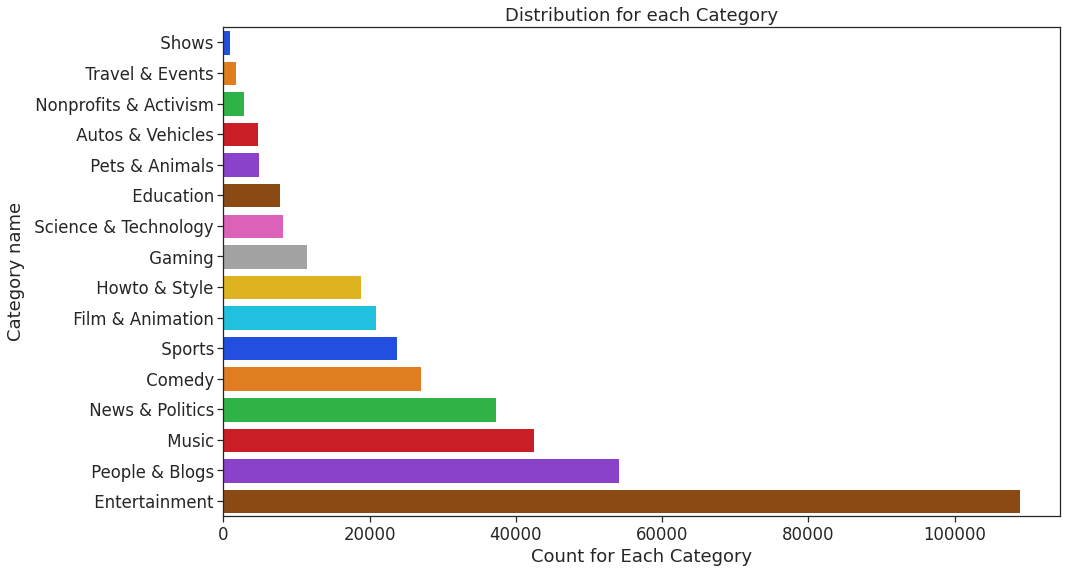

In [ ]:
# Plotting the category distribution by using horizontal bar graph.
fig = plt.figure(figsize =(15, 9))
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(font_scale = 1.5)
sns.set_style("ticks")
sns.barplot(y = category_distribution.index, x =category_distribution.values, palette = 'bright').set(title='Distribution for each Category',xlabel = 'Count for Each Category', ylabel='Category name')

plt.show()

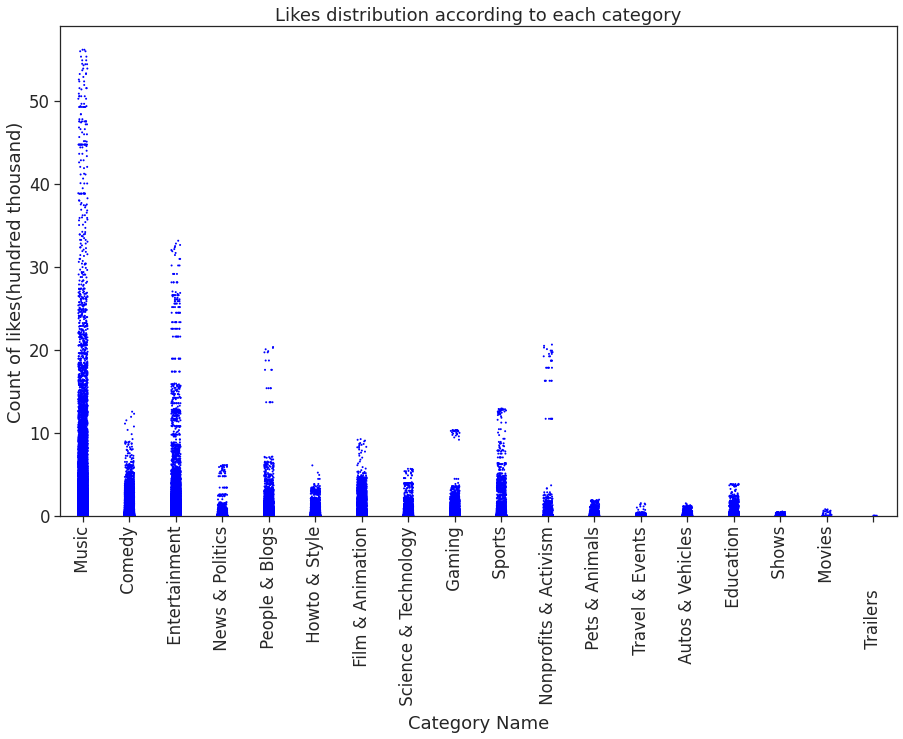

In [ ]:
# Plotting distribution of likes according to each category.
fig = plt.figure(figsize =(15, 9))
sns.stripplot(x = 'Category Name', y = full_df["likes"]/100000,  data = full_df, color = 'blue', size = 2).set(title = "Likes distribution according to each category",ylabel = 'Count of likes(hundred thousand)', xlabel='Category Name')
plt.xticks(rotation = "vertical")
plt.ylim(0)
plt.show()

In [ ]:
# Finding out count for each category for each country.
trail = full_df[["Country", "Category Name"]].groupby(["Country", "Category Name"]).size()
trail = trail.to_frame().reset_index()
trail.columns = ["Country", "Category Name", "Count"]
trail.sort_values(by = ["Country", "Count"], ascending = [True, False], inplace = True)
trail

,Country,Category Name,Count
3,CA,Entertainment,13451
9,CA,News & Politics,4159
11,CA,People & Blogs,4105
1,CA,Comedy,3773
8,CA,Music,3731
...,...,...,...
156,US,Gaming,817
166,US,Travel & Events,402
151,US,Autos & Vehicles,384
160,US,Nonprofits & Activism,57


In [ ]:
# Creating two dataframe each giving the top most and secound top most category for each country.
df_largest = pd.DataFrame()
df_second_largest = pd.DataFrame()
for country in trail["Country"].unique():
  df1 = trail[trail["Country"] == country].nlargest(1, "Count")
  df2 = trail[trail["Country"] == country].iloc[1]
  df_largest = df_largest.append(df1, ignore_index = True)
  df_second_largest = df_second_largest.append(df2, ignore_index = True)
print(df_largest)
print(df_second_largest)


  Country    Category Name  Count
0      CA    Entertainment  13451
1      DE    Entertainment  15292
2      FR    Entertainment   9819
3      GB            Music  13754
4      IN    Entertainment  16712
5      JP    Entertainment   6259
6      KR    Entertainment   8955
7      MX    Entertainment  13487
8      RU   People & Blogs  10350
9      US    Entertainment   9964
  Country     Category Name   Count
0      CA   News & Politics  4159.0
1      DE    People & Blogs  5988.0
2      FR    People & Blogs  5719.0
3      GB     Entertainment  9124.0
4      IN   News & Politics  5241.0
5      JP    People & Blogs  3915.0
6      KR   News & Politics  7582.0
7      MX    People & Blogs  8159.0
8      RU     Entertainment  5943.0
9      US             Music  6472.0


In [ ]:
df_largest["Category Name"].value_counts()

 Entertainment     8
 Music             1
 People & Blogs    1
Name: Category Name, dtype: int64

In [ ]:
df_largest.sort_values(by = "Category Name", inplace=True)
df_largest = df_largest[df_largest["Category Name"] == ' Entertainment']
df_largest

,Country,Category Name,Count
0,CA,Entertainment,13451
1,DE,Entertainment,15292
2,FR,Entertainment,9819
4,IN,Entertainment,16712
5,JP,Entertainment,6259
6,KR,Entertainment,8955
7,MX,Entertainment,13487
9,US,Entertainment,9964


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



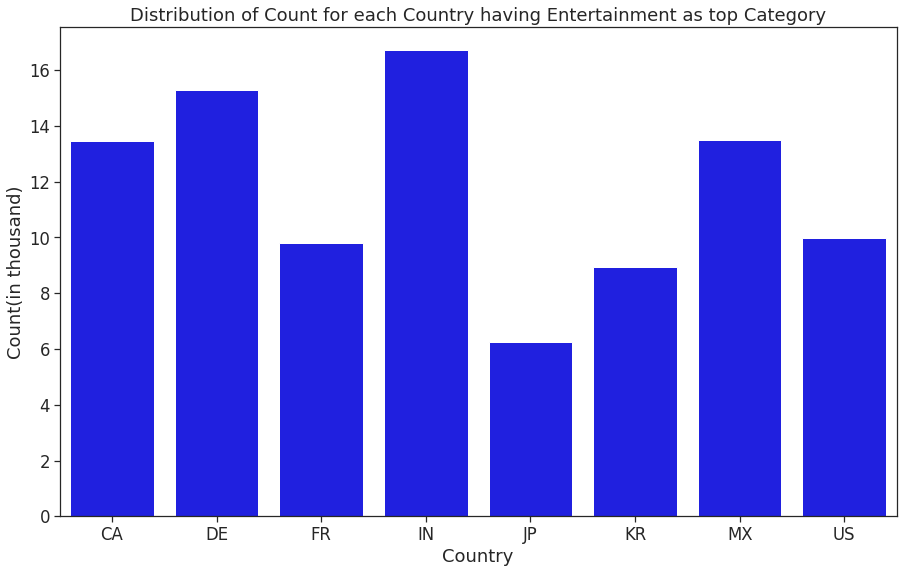

In [ ]:
# Plotting the Distribution of Count for each Country having Entertainment as top Category.
fig = plt.figure(figsize = (15, 9))
sns.set(font_scale = 1.5)
sns.set_style("ticks")
ax = sns.barplot(df_largest["Country"], df_largest["Count"]/1000, color ='blue')
ax.set(xlabel='Country', ylabel = 'Count(in thousand)', title = 'Distribution of Count for each Country having Entertainment as top Category')
plt.show()


In [ ]:
df_second_largest["Category Name"].value_counts()

 People & Blogs     4
 News & Politics    3
 Entertainment      2
 Music              1
Name: Category Name, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



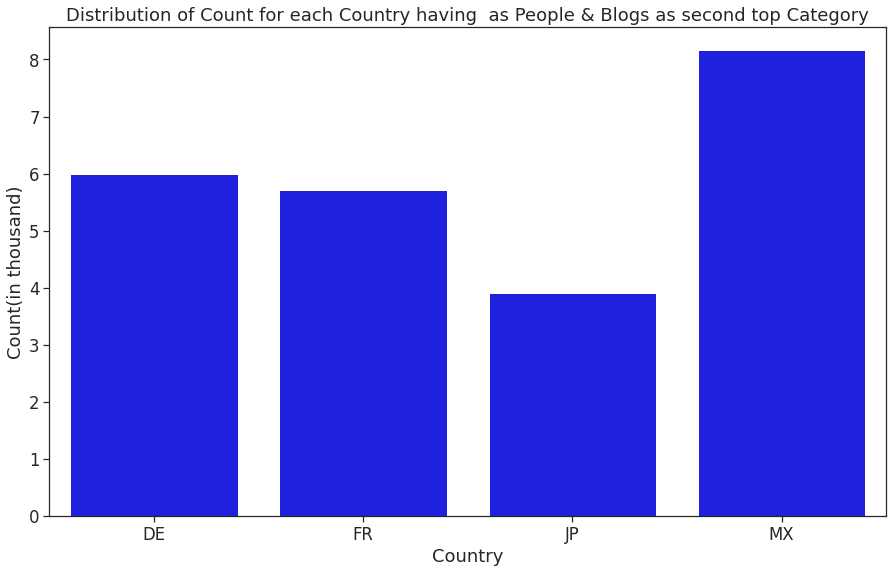

In [ ]:
# Plotting the Distribution of Count for each Country having  as People & Blogs as second top Category.
df_second_largest.sort_values(by = "Category Name", inplace=True)
df_second_largest = df_second_largest[df_second_largest["Category Name"] == " People & Blogs"]
fig = plt.figure(figsize = (15, 9))
sns.set(font_scale = 1.5)
sns.set_style("ticks")
ax = sns.barplot(df_second_largest["Country"], df_second_largest["Count"]/1000, color ='blue')
ax.set(xlabel='Country', ylabel = 'Count(in thousand)', title = 'Distribution of Count for each Country having  as People & Blogs as second top Category')
plt.show()

## **Observations**:
###**Distribution for each Category:**
The top 3 categories are:
-  Entertainment 
-  Music
-  People & Blogs

###**Distribution of likes according to each category :**
The top 3 most distributed categories according to likes are:
-  Entertainment 
-  Music
-  Comedy

###**Distribution of each category for each country:**
The top most category for each country are:
-  Entertainment 
-  Music
-  People & Blogs

The second top most category for each country are:
-  People & Blogs
-  News & Politics 
-  Entertainment
-  Music 
 

# **Analysis of Audience Engagement.**
#### To find out the audience enagagement acccording to each category and how is it related to number of likes, dislike and comments. We find out rate for each of the following:
- Like rate = (likes/views)*100
- Dislike rate = (dislikes/views)*100
- Comment count Rate = (comment count/views)*100

In [ ]:
# Add the calculated parameters to dataframe.
full_df['Like Rate'] = full_df["likes"]/full_df["views"]*100
full_df['Dislike Rate'] = full_df["dislikes"]/full_df["views"]*100
full_df['Comment_count Rate'] = full_df["comment_count"]/full_df["views"]*100
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,Category Name,Like Rate,Dislike Rate,Comment_count Rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music,4.874563,0.062887,0.253752


### To get more in-depth analysis about the distribution of data based on each category, we opt to analysis top 5 categories.


In [ ]:
full_df["Category Name"].value_counts().head(5)

 Entertainment      109006
 People & Blogs      54052
 Music               42514
 News & Politics     37288
 Comedy              26970
Name: Category Name, dtype: int64

In [ ]:
# We opt for top 5 categories for analysis.
full_df['Category Name'] = full_df['Category Name'].str.strip()
aud_engage = pd.DataFrame()
for cat in full_df['Category Name'].value_counts().nlargest(5).index:
    temp = full_df[full_df["Category Name"] == cat]
    aud_engage = aud_engage.append(temp, ignore_index = True)
aud_engage.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,Category Name,Like Rate,Dislike Rate,Comment_count Rate
0,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment,6.309630,0.094903,0.835851
1,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,...,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick âº https://S...,CA,Entertainment,6.540063,0.092081,0.812737
2,LUzsOyWp9lw,17.14.11,YOUTUBERS REACT TO TOP 10 TWITTER ACCOUNTS OF ...,FBE,24,2017-11-12T22:00:01.000Z,"twitter|""top 10""|""Taylor Swift""|""YOUTUBERS REA...",960747,31810,668,...,https://i.ytimg.com/vi/LUzsOyWp9lw/default.jpg,False,False,False,CLICK TO SUBSCRIBE TO THE YOUTUBERS IN THIS EP...,CA,Entertainment,3.310965,0.069529,0.555297
3,8NHA23f7LvU,17.14.11,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,2017-11-10T19:06:23.000Z,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,...,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...,CA,Entertainment,1.077111,0.015773,0.040435
4,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,CA,Entertainment,2.964146,0.194074,0.625350


In [ ]:
aud_engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269830 entries, 0 to 269829
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   video_id                269830 non-null  object 
 1   trending_date           269830 non-null  object 
 2   title                   269830 non-null  object 
 3   channel_title           269830 non-null  object 
 4   category_id             269830 non-null  int64  
 5   publish_time            269830 non-null  object 
 6   tags                    269830 non-null  object 
 7   views                   269830 non-null  int64  
 8   likes                   269830 non-null  int64  
 9   dislikes                269830 non-null  int64  
 10  comment_count           269830 non-null  int64  
 11  thumbnail_link          269830 non-null  object 
 12  comments_disabled       269830 non-null  bool   
 13  ratings_disabled        269830 non-null  bool   
 14  video_error_or_remov

In [ ]:
# Round off values for all the calculated rates.
def round_up(rat):
  return round(rat, 3)
aud_engage[["Like Rate", "Dislike Rate", "Comment_count Rate"]] = aud_engage[["Like Rate", "Dislike Rate", "Comment_count Rate"]].apply(round_up)
aud_engage.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,Category Name,Like Rate,Dislike Rate,Comment_count Rate
0,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment,6.310,0.095,0.836
1,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,...,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick âº https://S...,CA,Entertainment,6.540,0.092,0.813
2,LUzsOyWp9lw,17.14.11,YOUTUBERS REACT TO TOP 10 TWITTER ACCOUNTS OF ...,FBE,24,2017-11-12T22:00:01.000Z,"twitter|""top 10""|""Taylor Swift""|""YOUTUBERS REA...",960747,31810,668,...,https://i.ytimg.com/vi/LUzsOyWp9lw/default.jpg,False,False,False,CLICK TO SUBSCRIBE TO THE YOUTUBERS IN THIS EP...,CA,Entertainment,3.311,0.070,0.555
3,8NHA23f7LvU,17.14.11,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,2017-11-10T19:06:23.000Z,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,...,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...,CA,Entertainment,1.077,0.016,0.040
4,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,CA,Entertainment,2.964,0.194,0.625


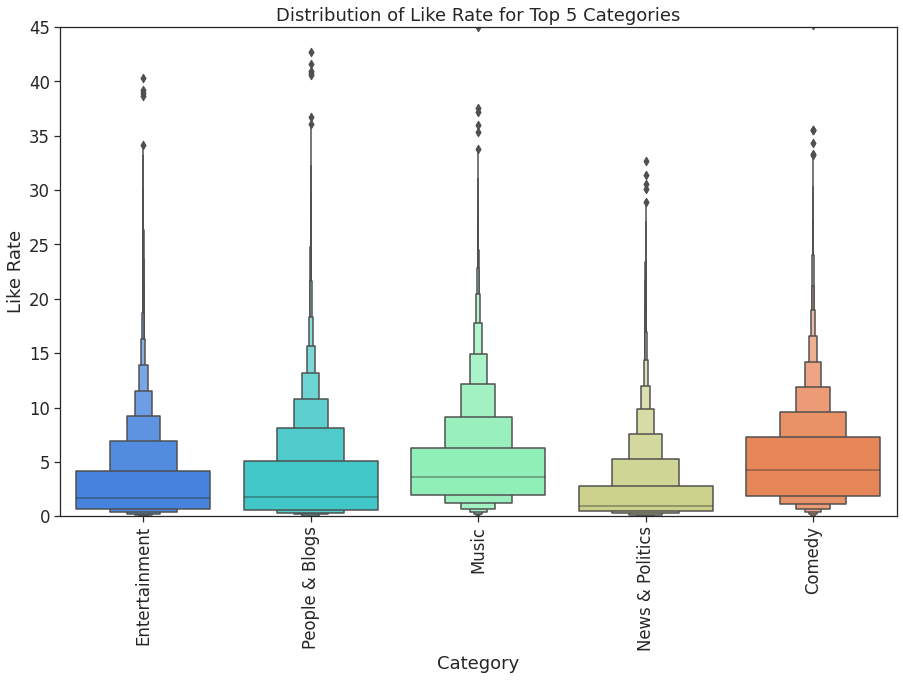

In [ ]:
# Audience liking for top 5 category. Catergory distribution according to like rate.
fig = plt.figure(figsize =(15, 9))
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(font_scale = 1.5)
sns.set_style("ticks")
sns.boxenplot(x = 'Category Name', y = aud_engage['Like Rate'], data = aud_engage, palette='rainbow').set(title = 'Distribution of Like Rate for Top 5 Categories')
plt.ylim(0,45)
plt.xlabel('Category')
plt.ylabel('Like Rate')
plt.xticks(rotation = 'vertical')
plt.show()

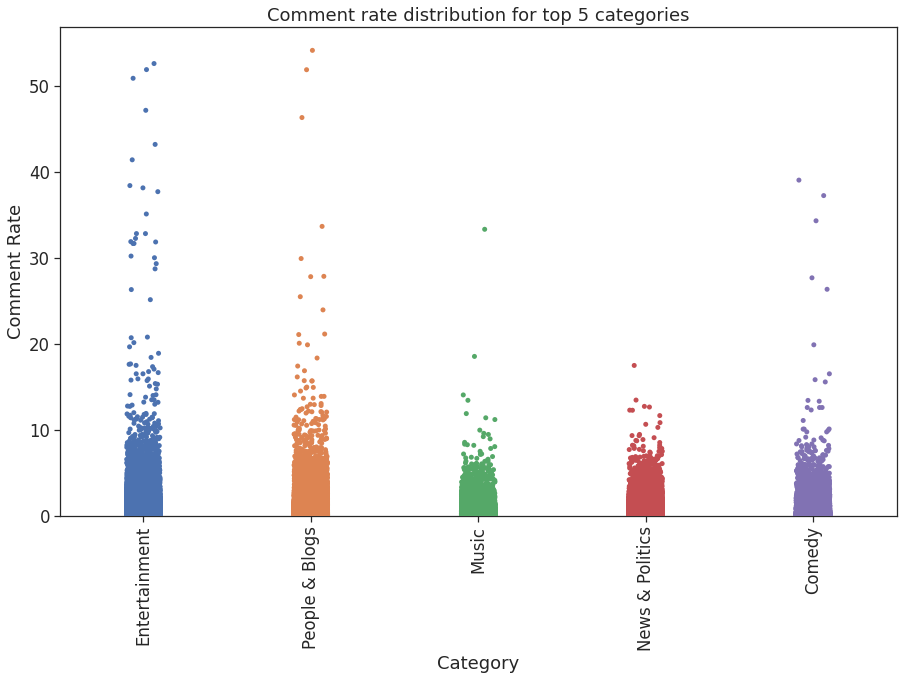

In [ ]:
# Comment rate for top 5 categories.
fig = plt.figure(figsize =(15, 9))
sns.set(font_scale = 1.5)
sns.set_style("ticks")
sns.stripplot(x = 'Category Name', y = aud_engage['Comment_count Rate'], data = aud_engage).set(title = "Comment rate distribution for top 5 categories")
plt.ylim(0)
plt.xlabel('Category')
plt.ylabel('Comment Rate')
plt.xticks(rotation = 'vertical')
plt.show()

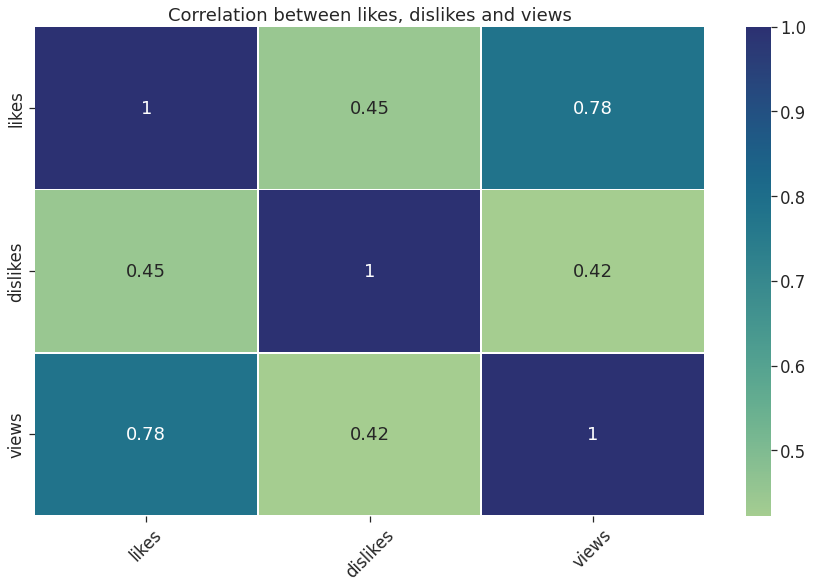

In [ ]:
# Heatmap which gives us a correlation between likes, dislikes and views.
fig = plt.figure(figsize =(15, 9))
sns.heatmap(aud_engage[['likes', 'dislikes', 'views']].corr(), annot = True, linewidth=.5, cmap = 'crest').set(title = "Correlation between likes, dislikes and views")
plt.xticks(rotation = 45)
plt.show()

## **Observations**:
### **Distribution of Like Rate for Top 5 Categories:**
The boxen plot gives us distribution of like rate for top 5 categories.

### **Comment rate distribution for Top 5 categories:**
The strip plot gives us the distribution of comment rate for top 5 categories.

### **Correlation between likes, dislikes and views:**
the heatmap gives us correlation between likes, dislikes and views.


# **Analyzing Trending Videos**
#### We will delve into the top 10 channels present in the dataset.


In [ ]:
full_df['channel_title'].value_counts().head(10)

The Late Show with Stephen Colbert        984
WWE                                       804
Late Night with Seth Meyers               773
VikatanTV                                 763
TheEllenShow                              743
Jimmy Kimmel Live                         707
The Tonight Show Starring Jimmy Fallon    705
PewDiePie                                 652
RadaanMedia                               651
The Late Late Show with James Corden      583
Name: channel_title, dtype: int64

In [ ]:
# Video count frequency for 10 likes channels.
channel_video = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending = True).to_frame().reset_index().rename(columns = {"video_id": 'total video count'})
channel_video_first_10 = channel_video[-10:]
channel_video_first_10

,channel_title,total video count
37814,The Late Late Show with James Corden,583
37815,RadaanMedia,651
37816,PewDiePie,652
37817,The Tonight Show Starring Jimmy Fallon,705
37818,Jimmy Kimmel Live,707
37819,TheEllenShow,743
37820,VikatanTV,763
37821,Late Night with Seth Meyers,773
37822,WWE,804
37823,The Late Show with Stephen Colbert,984


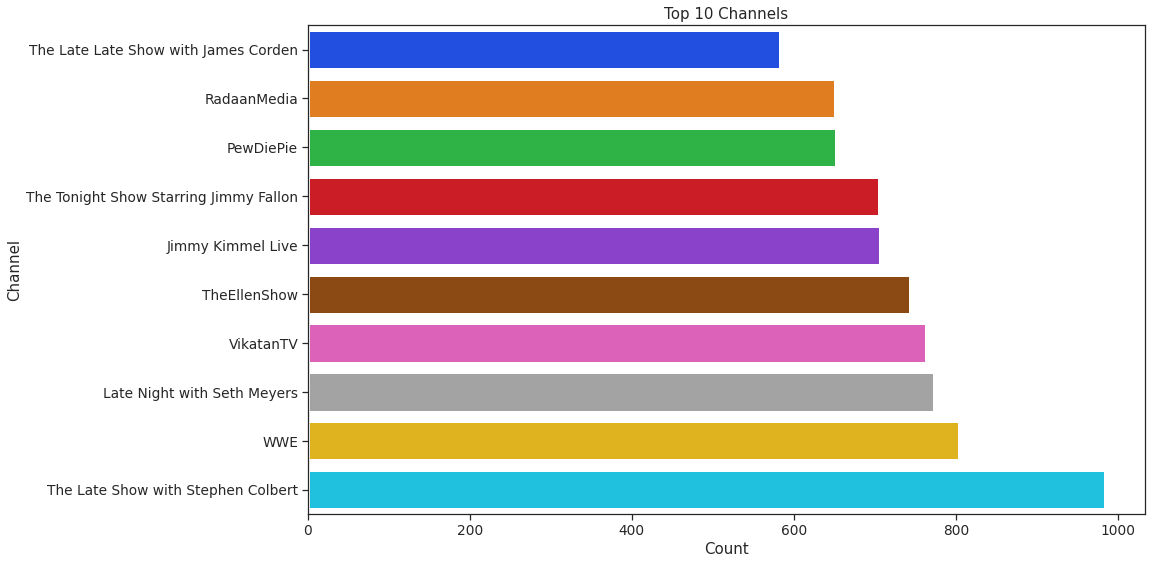

In [ ]:
# Video count frequency for 10 likes channels.
fig = plt.figure(figsize =(15, 9))
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(font_scale = 1.25)
sns.set_style("ticks")
sns.barplot(x = channel_video_first_10['total video count'], y =channel_video_first_10['channel_title'], linewidth = 3, palette = "bright").set(title = 'Top 10 Channels', ylabel = 'Channel', xlabel='Count')
plt.show()

In [ ]:
#Creating a dataframe of top 10 channels.
channel_df = pd.DataFrame()
for channel in full_df['channel_title'].value_counts().head(10).index:
  temp = full_df[full_df["channel_title"] == channel]
  channel_df = channel_df.append(temp, ignore_index = True)
channel_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,Category Name,Like Rate,Dislike Rate,Comment_count Rate
0,j1yVXcJxmSA,17.14.11,Trump's MÃ©nage Ã Terrible Phone Call With Fr...,The Late Show with Stephen Colbert,24,2017-11-11T08:35:00.000Z,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",756959,9976,262,...,https://i.ytimg.com/vi/j1yVXcJxmSA/default.jpg,False,False,False,Some interesting details were leaked about a p...,CA,Entertainment,1.317905,0.034612,0.085209
1,b-ShNqtj8Yw,17.15.11,Kim Jong-Un Hurt President Trump's 'Old' Feelings,The Late Show with Stephen Colbert,24,2017-11-14T08:35:01.000Z,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",1025278,14065,593,...,https://i.ytimg.com/vi/b-ShNqtj8Yw/default.jpg,False,False,False,President Trump isn't exactly defusing the thr...,CA,Entertainment,1.371823,0.057838,0.178001
2,I1iSrCtZb7w,17.16.11,Roy Moore Was Banned From A Mall And YMCA,The Late Show with Stephen Colbert,24,2017-11-15T08:35:01.000Z,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",788000,10315,160,...,https://i.ytimg.com/vi/I1iSrCtZb7w/default.jpg,False,False,False,Alabama senate candidate Roy Moore had to trav...,CA,Entertainment,1.309010,0.020305,0.163452
3,4zT9DsfIsP4,17.17.11,Roy Moore Still Has Robots On His Side,The Late Show with Stephen Colbert,24,2017-11-16T08:35:01.000Z,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",791834,10359,228,...,https://i.ytimg.com/vi/4zT9DsfIsP4/default.jpg,False,False,False,Alabama voters are getting fake calls from rec...,CA,Entertainment,1.308229,0.028794,0.094591
4,eOQpjvnm4ME,17.18.11,The Bipartisan Pastime Of Harassing Women,The Late Show with Stephen Colbert,24,2017-11-17T08:35:01.000Z,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",1291361,16081,1368,...,https://i.ytimg.com/vi/eOQpjvnm4ME/default.jpg,False,False,False,Stephen's monologue takes aim at sexual miscon...,CA,Entertainment,1.245275,0.105935,0.222788


In [ ]:
# Creating a Dataframe for top 10 channels and which country they are aired.
group = channel_df.groupby("channel_title")
channel_country = group.apply(lambda x: x['Country'].nunique())
channel_country  = channel_country.to_frame().reset_index().rename({0 : "Number of Countries Aired In"}, axis = "columns")
channel_country = channel_country.append(channel_country, ignore_index = True).sort_values(by = "Number of Countries Aired In").drop_duplicates()
channel_country

,channel_title,Number of Countries Aired In
13,RadaanMedia,4
18,VikatanTV,4
9,WWE,8
11,Late Night with Seth Meyers,8
5,The Late Show with Stephen Colbert,9
7,TheEllenShow,10
4,The Late Late Show with James Corden,10
10,Jimmy Kimmel Live,10
2,PewDiePie,10
16,The Tonight Show Starring Jimmy Fallon,10


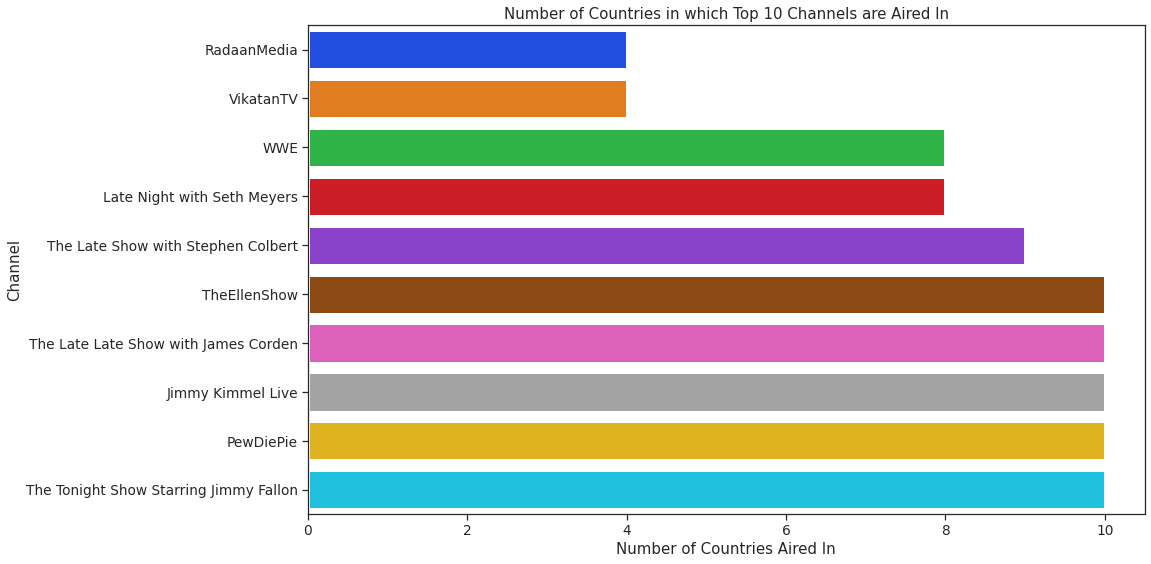

In [ ]:
# Number of Countries in which Top 10 Channels are Aired In
fig = plt.figure(figsize =(15, 9))
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(font_scale = 1.25)
sns.set_style("ticks")
sns.barplot(x = channel_country["Number of Countries Aired In"], y = channel_country['channel_title'], linewidth = 3, palette = "bright").set(title = 'Number of Countries in which Top 10 Channels are Aired In', ylabel = 'Channel', xlabel = "Number of Countries Aired In")
plt.show()

In [ ]:
# Number of Categories present per channel.
grouped = channel_df.groupby("channel_title")
channel_cat = grouped.apply(lambda x: x['Category Name'].nunique())
channel_cat = channel_cat.to_frame().reset_index().drop_duplicates().rename({0 : "Number of Categories per Channel"}, axis = "columns").sort_values(by = "Number of Categories per Channel")
channel_cat

,channel_title,Number of Categories per Channel
1,Late Night with Seth Meyers,1
3,RadaanMedia,1
6,The Tonight Show Starring Jimmy Fallon,1
7,TheEllenShow,1
4,The Late Late Show with James Corden,2
5,The Late Show with Stephen Colbert,2
8,VikatanTV,2
9,WWE,2
0,Jimmy Kimmel Live,3
2,PewDiePie,8


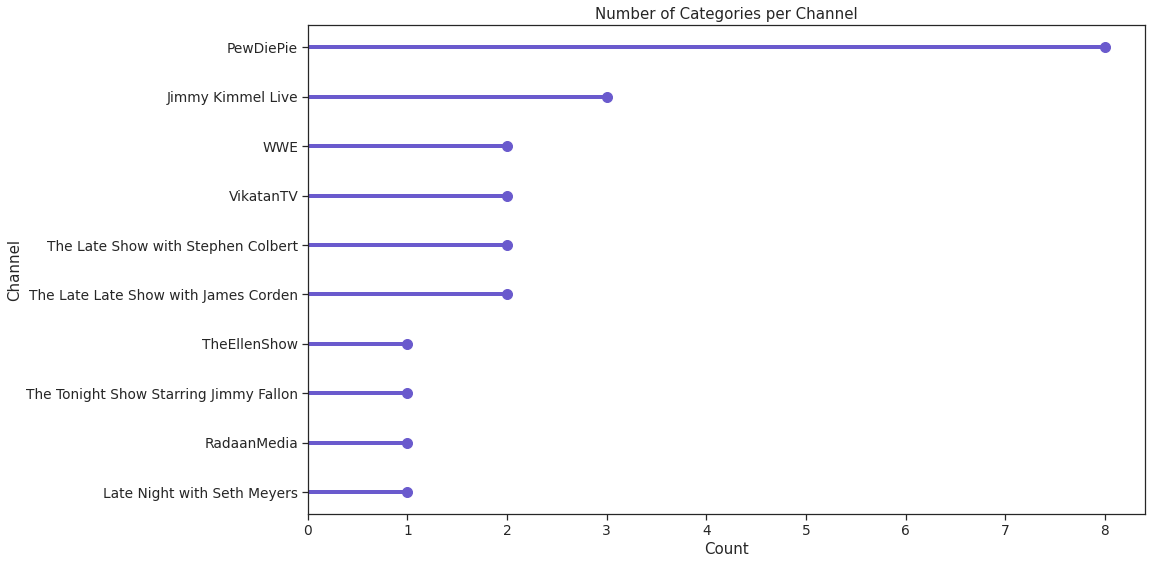

In [ ]:
# Stem Plot of Number of Categories per Channel
fig = plt.figure(figsize =(15, 9))
plt.hlines(y = channel_cat['channel_title'], xmin = 0, xmax = channel_cat['Number of Categories per Channel'],
           color='slateblue', linewidth = 4)
plt.plot(channel_cat['Number of Categories per Channel'], channel_cat['channel_title']
         ,'o', ms = 10, c = 'slateblue')
plt.ylabel('Channel')
plt.xlabel('Count')
plt.title('Number of Categories per Channel')
plt.xlim(0)
plt.show()


## **Observations**:
###**Video count frequency for 10 to channels.:**
- Gives top 10 channels.

###**Number of Countries in which Top 10 Channels are Aired In**
- Frequency of countries for each channel.

###**Stem Plot of Number of Categories per Channel**

- Frequency of categories for each country.

## Does Punctuations have an impact on views, likes, dislikes ?
- Impact of punctuations in the video title on views, likes and dislikes.
- We use the string module to analyze the punctuations in the video title.

In [ ]:
full_df['channel_title'].head(10)

0          EminemVEVO
1           iDubbbzTV
2        Rudy Mancuso
3            nigahiga
4          Ed Sheeran
5          DramaAlert
6        VanossGaming
7        CaseyNeistat
8    Logan Paul Vlogs
9         Sheikh Musa
Name: channel_title, dtype: object

In [ ]:
# Importing the string module.
import string

In [ ]:
# The punctuations present in the string module.
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Gives the count of punctuations in each video title.
def punc_count(st):
  return len([char for char in st if char in string.punctuation])

In [ ]:
# Added a new feature to the dataset called "punctuation_count"
full_df['punctuation_count'] = full_df['title'].apply(punc_count)
full_df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,Category Name,Like Rate,Dislike Rate,Comment_count Rate,punctuation_count
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639,4
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185,1


In [ ]:
full_df['views'].head(5)

0    17158579
1     1014651
2     3191434
3     2095828
4    33523622
Name: views, dtype: int64

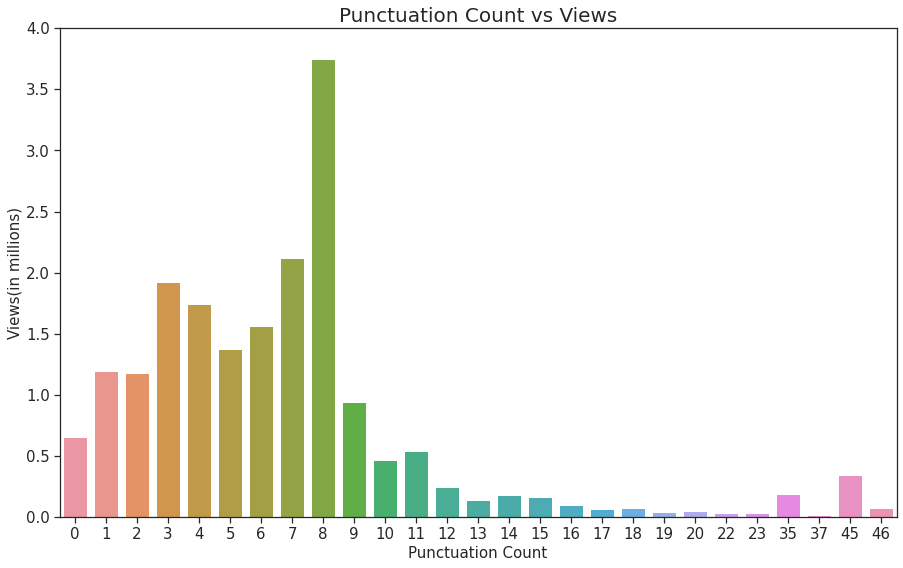

In [ ]:
# Punctuation Count Vs View Count
fig = plt.figure(figsize =(15, 9))
sns.barplot(x = full_df['punctuation_count'], y = full_df['views']/1000000, data = full_df, ci = None)
plt.ylim(0,4)
plt.title('Punctuation Count vs Views', fontsize = 20)
plt.xlabel("Punctuation Count", fontsize = 15)
plt.ylabel("Views(in millions)", fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()